In [5]:
from sklearn import datasets, linear_model

boston = datasets.load_boston()
x = boston.data
y = boston.target

regr = linear_model.LinearRegression()
regr.fit(x, y)


print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
Intercept: 
 36.4911032804


In [6]:
import numpy as np

print('Residue sum of squares: %.2f' % np.mean((regr.predict(x) - y) ** 2))
print('R^2 score: %.2f' % regr.score(x, y))

train = np.random.choice([True, False], len(x), replace=True, p=[0.9,0.1])
x_train = x[train,:]
y_train = y[train]
x_test = x[~train,:]
y_test = y[~train]
regr.fit(x_train, y_train)
print('R^2 score: %.2f' % regr.score(x_test, y_test))

Residue sum of squares: 21.90
R^2 score: 0.74
R^2 score: 0.75


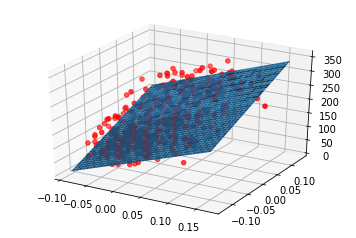

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

diabetes = datasets.load_diabetes()
x = diabetes.data[:,[2,8]]
y = diabetes.target
regr = linear_model.LinearRegression()
regr.fit(x, y)
steps = 40
lx0 = np.arange(min(x[:,0]), max(x[:,0]), (max(x[:,0]) - min(x[:,0])) / steps).reshape(steps,1)
lx1 = np.arange(min(x[:,1]), max(x[:,1]), (max(x[:,1]) - min(x[:,1])) / steps).reshape(steps,1)
xx0, xx1 = np.meshgrid(lx0, lx1)
xx = np.zeros(shape = (steps,steps,2))
xx[:,:,0] = xx0
xx[:,:,1] = xx1
x_stack = xx.reshape(steps ** 2, 2)
y_stack = regr.predict(x_stack)
yy = y_stack.reshape(steps, steps)

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(x[:,0], x[:,1], y, color = 'red')
ax.plot_surface(xx0, xx1, yy, rstride=1, cstride=1)
plt.show()